In [106]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import PIL
import PIL.Image
import pandas as pd
import numpy as np

import pathlib
import os

img_height = 32
img_width = 32
batch_size = 2
split_seed = 41123

In [107]:
directory = "dataOLD/"
df = pd.read_csv(directory + "data.csv")
file_paths = df["file_name"].values
labelx = df["label_x"].values
labely = df["label_y"].values

ds_train = tf.data.Dataset.from_tensor_slices((file_paths, labelx, labely))

In [108]:
directory = "dataOLD/"
df = pd.read_csv(directory + "data.csv")

image_paths = df["file_name"].values
coordinates = pd.read_csv("dataOLD/data.csv")

def load_image(image_path):
    image = tf.io.read_file(directory + image_path)
    image = tf.image.decode_png(image, channels = 1)
    image = tf.image.resize(image, [32, 32])
    image = image / 255.0
    return image

def load_data(image_path, label):
    image = load_image(image_path)
    return image, label

image_paths_tensor = tf.constant(image_paths)
coordinates_tensor = tf.convert_to_tensor(coordinates[["label_x", "label_y"]].values, dtype=tf.float32)

dataset = tf.data.Dataset.from_tensor_slices((image_paths_tensor, coordinates_tensor))
dataset = dataset.map(lambda path, coords: (load_image(path), coords))
dataset = dataset.batch(32)
dataset = dataset.shuffle(buffer_size=32, seed=split_seed)

# Train-test split
train_ratio = 0.8
total_size = 603
train_size = int(total_size * train_ratio)
test_size = total_size - train_size

train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)

In [121]:
amongus = tf.io.read_file("test.png")
amongus = tf.image.decode_png(amongus, channels = 1)
amongus = tf.image.resize(amongus, [32, 32])
amongus = amongus / 255.0
list(amongus.numpy())

[array([[0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314],
        [0.00784314]], dtype=float32),
 array([[0.00784314],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.    

In [110]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

model.compile(
    optimizer="adam",
    loss="mean_squared_error"
)

c:\Users\LENOVO\miniconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [111]:
model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d_9" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 32, 32, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 32, 32, 1), dtype=float32)
  • training=True
  • mask=None

In [ ]:
dataset

<_ShuffleDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

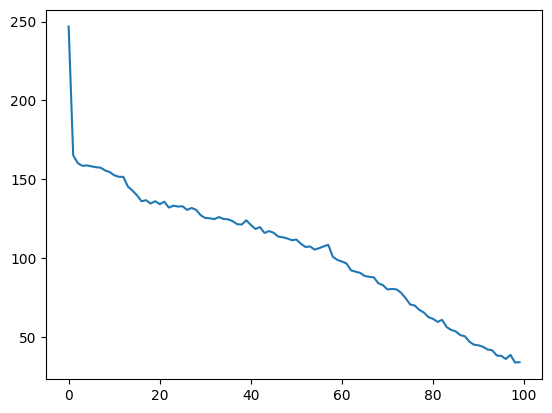

In [ ]:
loss = model.history.history["loss"]

plt.figure()
plt.plot(loss)